### Preanalisis de Imagenes

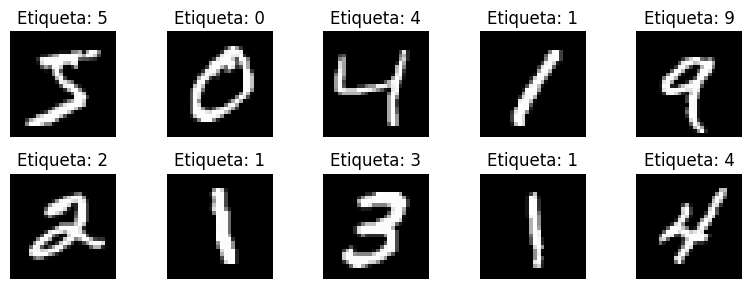

Dimensiones imagenes: (28, 28)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

print("Dimensiones imagenes:", x_train.shape[1:])

### Red

c:\Users\anapa\anaconda3\envs\deep_learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
60000 train samples
10000 test samples
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,418 (5.54 KB)

 Trainable params: 1,418 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2880 - loss: 1.9749 - val_accuracy: 0.6599 - val_loss: 1.0418
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7150 - loss: 0.9127 - val_accuracy: 0.7981 - val_loss: 0.6682
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7881 - loss: 0.6750 - val_accuracy: 0.8325 - val_loss: 0.5478
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8242 - loss: 0.5720 - val_accuracy: 0.8476 - val_loss: 0.4964
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8391 - loss: 0.5134 - val_accuracy: 0.8654 - val_loss: 0.4513
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8510 - loss: 0.4850 - val_accuracy: 0.8626 - val_loss: 0.4342
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8584 - loss: 0.4606 - val_accuracy: 0.8803 - val_loss: 0.3940
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8713 - loss: 0.4195 - val_accu

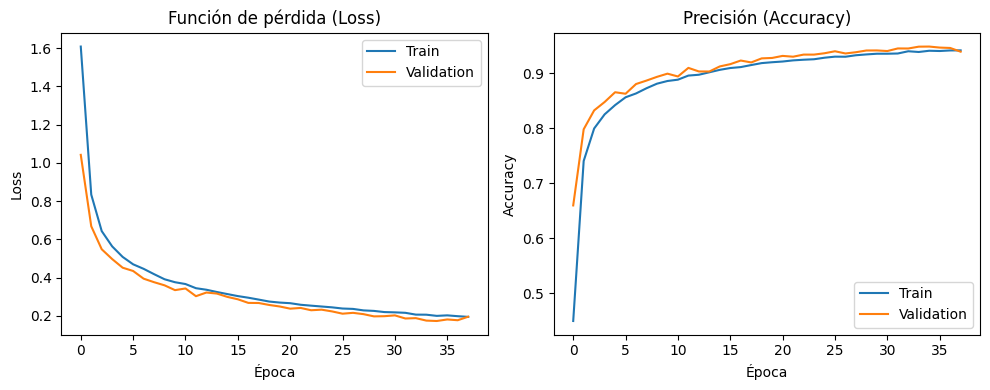

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 10
input_shape = (28, 28, 1)  # imágenes 28x28, escala de grises

# Network Arquitecture
model = keras.Sequential([
    layers.Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

# Datos
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# (Keras espera 4D: batch, alto, ancho, canal)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)

# One-hot encoding de las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

model.summary()

# Compilacion modelo:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-3),
    metrics=["accuracy"]
)

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=3,           # cuántas épocas sin mejora esperar antes de detener
    restore_best_weights=True # vuelve a los mejores pesos (no los del final)
)

# Entrenamiento
epochs = 100
batch_size = 200

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.17,  # fraccion datos train usados para validation
    callbacks=[early_stop],
    verbose=1
)

# Evaluacion
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en test: {test_acc:.4f}")
print(f"Loss en test: {test_loss:.4f}")

# Graficos
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Función de pérdida (Loss)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Precisión (Accuracy)")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print(f"Accuracy en test: {test_acc:.4f}")
print(f"Accuracy en val: {history.history['val_accuracy'][-1]:.4f}")
print(f"Accuracy en train: {history.history['accuracy'][-1]:.4f}")

# Calcular etiquetas predichas y verdaderas
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Matriz de confusión - MNIST (Test)")
plt.show()
